In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.metrics import confusion_matrix


import torch
from ultralytics import YOLO

In [2]:
device = torch.device('cuda:0')

### The following code is used to obtain the confusion matrix

In [ ]:
##Adapt path to weight location
modela = YOLO("yolov11/runs/segment/andalusite/weights/best.pt")
modelb = YOLO("yolov11/runs/segment/biotite/weights/best.pt")
modelo = YOLO("yolov11/runs/segment/ooid//weights/best.pt")

In [ ]:
#Folder with images to predict
image_path = 'yolov11/datasets/Ooids/test/images/'
##Image pixel height
imgsz = "1280"
##No overlap between predictions
iou = 0
##Image process batch
batch = 6
##Confidence threshold
conf=0.8

predictions = modelo.predict(source=image_path, save=True, imgsz=imgsz, conf=conf, device=device, iou = iou, batch = batch)b

### Next, we read the training results for each model

In [6]:
df_segment_and  = pd.read_csv("Andalusite/results.csv")
df_segment_bio  = pd.read_csv("Biotite/results.csv")
df_segment_ooi  = pd.read_csv("Ooid/results.csv")

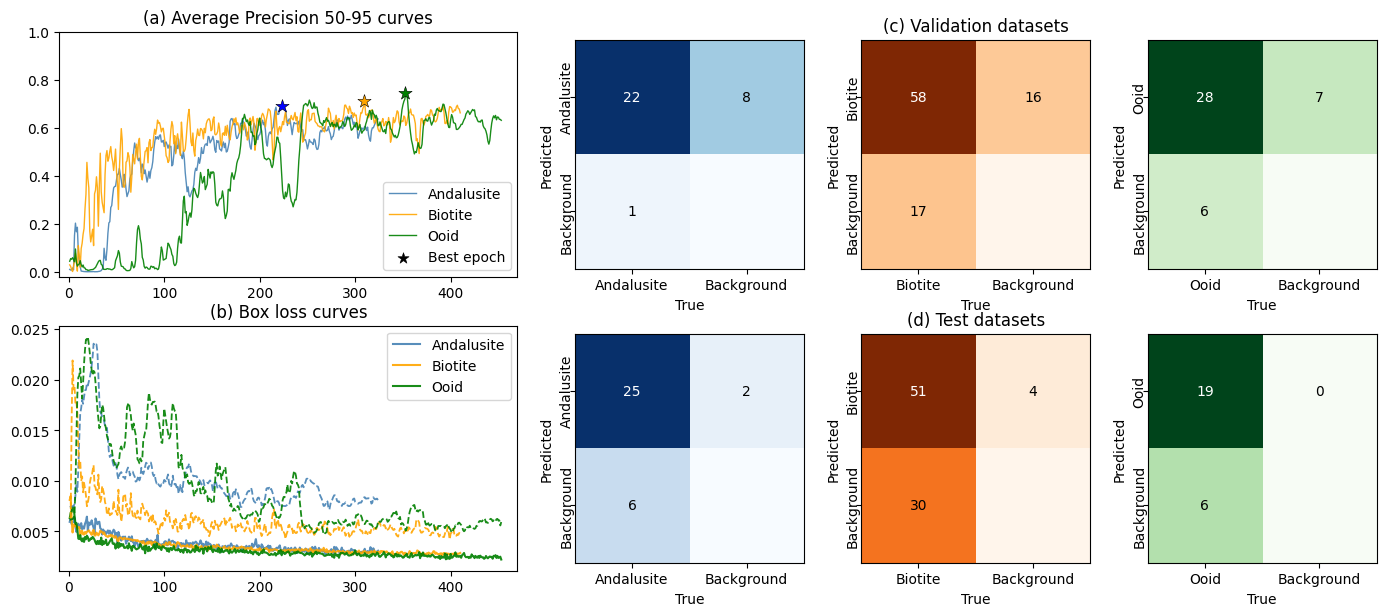

In [7]:
fig, axes = plt.subplots(2,4, figsize=(17,7), gridspec_kw={'width_ratios':[2,1,1,1]})


axes[0][0].plot(df_segment_and['epoch'], df_segment_and['metrics/mAP50-95(B)'], linewidth = 1, alpha = 0.9, label = 'Andalusite', color = 'steelblue')
axes[0][0].plot(df_segment_bio['epoch'], df_segment_bio['metrics/mAP50-95(B)'], linewidth = 1, alpha = 0.9, label = 'Biotite', color = 'orange')
axes[0][0].plot(df_segment_ooi['epoch'], df_segment_ooi['metrics/mAP50-95(B)'], linewidth = 1, alpha = 0.9, label = 'Ooid', color = 'green')

axes[0][0].scatter(int(df_segment_and['epoch'].values[-1]-101),df_segment_and['metrics/mAP50-95(B)'][int(df_segment_and['epoch'].values[-1]-101)], marker = '*', color='blue', s=100, edgecolor='black', linewidth=0.4,zorder=4) 
axes[0][0].scatter(int(df_segment_bio['epoch'].values[-1]-101),df_segment_bio['metrics/mAP50-95(B)'][int(df_segment_bio['epoch'].values[-1]-101)], marker = '*', color='orange', s=100, edgecolor='black', linewidth=0.4,zorder=4) 
axes[0][0].scatter(int(df_segment_ooi['epoch'].values[-1]-101),df_segment_ooi['metrics/mAP50-95(B)'][int(df_segment_ooi['epoch'].values[-1]-101)], marker = '*', color='green', s=100, edgecolor='black', linewidth=0.4,zorder=4) 
axes[0][0].scatter(-100, -100, marker = '*', color='black', s=70, edgecolor='black', linewidth=0.4, label = 'Best epoch') 


# axes[0][0].plot(df_segment_and['epoch'], df_segment_and['metrics/recall(B)'], linewidth = 1, alpha = 0.9, label = 'Andalusite', color = 'steelblue')
# axes[0][0].plot(df_segment_bio['epoch'], df_segment_bio['metrics/recall(B)'], linewidth = 1, alpha = 0.9, label = 'Biotite', color = 'orange')
# axes[0][0].plot(df_segment_ooi['epoch'], df_segment_ooi['metrics/recall(B)'], linewidth = 1, alpha = 0.9, label = 'Ooid', color = 'green')


axes[0][0].set_xlim(-10, 470)
axes[0][0].set_ylim(-0.02, 1)
axes[0][0].set_title("(a) Average Precision 50-95 curves")
axes[0][0].legend()




axes[1][0].plot(df_segment_and['epoch'], df_segment_and['train/box_loss'], linewidth = 1.5, alpha = 0.9, label = 'Andalusite', color = 'steelblue')
axes[1][0].plot(df_segment_bio['epoch'], df_segment_bio['train/box_loss'], linewidth = 1.5, alpha = 0.9, label = 'Biotite', color = 'orange')
axes[1][0].plot(df_segment_ooi['epoch'], df_segment_ooi['train/box_loss'], linewidth = 1.5, alpha = 0.9, label = 'Ooid', color = 'green')

axes[1][0].plot(df_segment_and['epoch'], df_segment_and['val/box_loss'], linewidth = 1.3, alpha = 0.9, linestyle='dashed', color = 'steelblue')
axes[1][0].plot(df_segment_bio['epoch'], df_segment_bio['val/box_loss'], linewidth = 1.3, alpha = 0.9, linestyle='dashed', color = 'orange')
axes[1][0].plot(df_segment_ooi['epoch'], df_segment_ooi['val/box_loss'], linewidth = 1.3, alpha = 0.9, linestyle='dashed', color = 'green')


axes[1][0].set_title("(b) Box loss curves")
axes[1][0].set_xlim(-10, 470)
axes[1][0].legend()

andalusite_x = ['Andalusite','Background']
andalusite_y = ['Andalusite','Background']
andalusite_train = [
    [22,8],
    [1,0]
]
andalusite_test = [
    [25,2], #31
    [6,0]
]

biotite_x = ['Biotite','Background']
biotite_y = ['Biotite','Background']
biotite_train = [
    [58,16],
    [17,0]
]
biotite_test = [
    [51,4], #81
    [30,0]
]

ooid_x = ['Ooid','Background']
ooid_y = ['Ooid','Background']
ooid_train = [
    [28,7],
    [6,0]
]
ooid_test = [
    [19,0], #25
    [6,0]
]

andalusite_train_heat = axes[0][1].imshow(andalusite_train, cmap = 'Blues')
biotite_train_heat = axes[0][2].imshow(biotite_train, cmap = 'Oranges')
ooid_train_heat = axes[0][3].imshow(ooid_train, cmap = 'Greens')

andalusite_test_heat = axes[1][1].imshow(andalusite_test, cmap = 'Blues')
biotite_test_heat = axes[1][2].imshow(biotite_test, cmap = 'Oranges')
ooid_test_heat = axes[1][3].imshow(ooid_test, cmap = 'Greens')

axes[0][1].set_xticks(np.arange(len(andalusite_x)), labels = andalusite_x)
axes[0][2].set_xticks(np.arange(len(biotite_x)), labels = biotite_x)
axes[0][3].set_xticks(np.arange(len(ooid_x)), labels = ooid_x)

axes[0][1].set_yticks(np.arange(len(andalusite_y)), labels = andalusite_y)
axes[0][2].set_yticks(np.arange(len(biotite_y)), labels = biotite_y)
axes[0][3].set_yticks(np.arange(len(ooid_y)), labels = ooid_y)

axes[1][1].set_xticks(np.arange(len(andalusite_x)), labels = andalusite_x)
axes[1][2].set_xticks(np.arange(len(biotite_x)), labels = biotite_x)
axes[1][3].set_xticks(np.arange(len(ooid_x)), labels = ooid_x)

axes[1][1].set_yticks(np.arange(len(andalusite_y)), labels = andalusite_y)
axes[1][2].set_yticks(np.arange(len(biotite_y)), labels = biotite_y)
axes[1][3].set_yticks(np.arange(len(ooid_y)), labels = ooid_y)

plt.setp(axes[0][1].get_yticklabels(), rotation=90, ha="center", rotation_mode="anchor")
plt.setp(axes[0][2].get_yticklabels(), rotation=90, ha="center", rotation_mode="anchor")
plt.setp(axes[0][3].get_yticklabels(), rotation=90, ha="center", rotation_mode="anchor")

plt.setp(axes[1][1].get_yticklabels(), rotation=90, ha="center", rotation_mode="anchor")
plt.setp(axes[1][2].get_yticklabels(), rotation=90, ha="center", rotation_mode="anchor")
plt.setp(axes[1][3].get_yticklabels(), rotation=90, ha="center", rotation_mode="anchor")

axes[0][2].set_title("(c) Validation datasets")
axes[1][2].set_title("(d) Test datasets")

axes[1][1].set_xlabel('True')
axes[1][2].set_xlabel('True')
axes[1][3].set_xlabel('True')
axes[0][1].set_xlabel('True')
axes[0][2].set_xlabel('True')
axes[0][3].set_xlabel('True')

axes[1][1].set_ylabel('Predicted')
axes[1][2].set_ylabel('Predicted')
axes[1][3].set_ylabel('Predicted')
axes[0][1].set_ylabel('Predicted')
axes[0][2].set_ylabel('Predicted')
axes[0][3].set_ylabel('Predicted')


for i in range(len(biotite_y)):
    for j in range(len(biotite_x)):
        if not (i == 1 and j == 1):
            
            if (i == 0 and j == 0):
                color = 'w'
            else:
                color = 'black'
                
            text = axes[0][1].text(j, i, andalusite_train[i][j], ha="center", va="center", color=color)
            text = axes[0][2].text(j, i, biotite_train[i][j], ha="center", va="center", color=color)
            text = axes[0][3].text(j, i, ooid_train[i][j], ha="center", va="center", color=color)
            text = axes[1][1].text(j, i, andalusite_test[i][j], ha="center", va="center", color=color)
            text = axes[1][2].text(j, i, biotite_test[i][j], ha="center", va="center", color=color)
            text = axes[1][3].text(j, i, ooid_test[i][j], ha="center", va="center", color=color)



# axes[1][0].set_ylim(0, 0.025)
# plt.savefig('train_results.png',dpi=300)